In [4]:
import numpy as np
import scipy.special
import time

In [5]:
def preparation(gamma, repeats, K = 20):
    #K is the number of phase estimation rounds of standard phase estimation
    #K=20 corresponds to about 1e6 spins
    
    Tphi = 2e-6
    T1 = 50e-6
    #2 us and 50 us respectively
    
    gamma = gamma * 1e6  # 1e6 s = 1 MHz
    for j in range(1, K+1):
        t = np.pi/2**(j-1)/gamma #evolution time of the jth round of phase estimation
        
        p1 = 1 - np.exp(-t/(2*T1) )  # Probability that ancilla qubit decays
        p2 = ( 1-np.exp(-t/Tphi) )/2 # Probability that ancilla qubit obtains a Pauli Z error

        n0 = 0  # number of correct outcomes
        n1 = 0  # number of wrong outcomes
        n2 = 0  # number of ancilla decay, if n2 = repeats, preparation fails
        for i in range(repeats):
            if np.random.random() <= p1:
                n2 += 1
                if np.random.random() <= 0.5: 
                # When ancilla qubit decays, the measurement outcome becomes 0,1 randomly with euqal probability
                    n0 += 1
                else:
                    n1 += 1
            else:
                if np.random.random()<= p2:
                    n1 += 1
                else:
                    n0 += 1
        
        if n2 == repeats or n1 > n0:
        # If n2 == repeats, there is no projection at all, this round phase estimation fails
            fail = 1
            return fail
    fail = 0
    return fail

In [7]:
simulation_rounds = 10000
# Because the simulation here does not involve density matrix, it is very fast
# And we don't need to worry about the error bar.
Repeats = [1 + 2*i for i in range(8)]
Gammas = [2, 3, 5, 10]
Fidelities = []
for gamma in Gammas:
    Fidelity = []
    for repeats in Repeats:
        fail  = 0
        for _ in range(simulation_rounds):
            fail += preparation(gamma, repeats, K = 20)
        fidelity = 1- fail/simulation_rounds
        Fidelity.append(fidelity)
    Fidelities.append(Fidelity)

In [8]:
import matplotlib.pyplot as plt

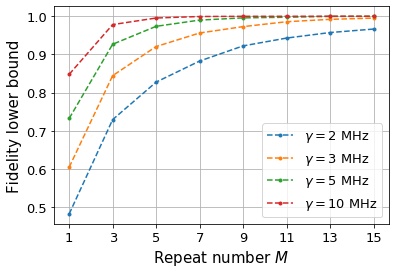

In [10]:
plt.grid()
for i in range(len(Gammas)):
    gamma = Gammas[i]
    Fidelity = Fidelities[i]

    plt.plot(Repeats, Fidelity, linestyle = "--", marker = '.', label = r"$\gamma = {}$ MHz".format(gamma))
plt.legend(prop = {'size':13})
plt.xlabel(r"Repeat number $M$", size = 15)
plt.ylabel(r"Fidelity lower bound", size = 15)
plt.xticks(fontsize = 13)
plt.yticks(fontsize = 13)
plt.xticks(Repeats)
plt.savefig("AncillaDecoherence.pdf", dpi =800)

In [72]:
pwd

'C:\\Users\\admin_01'